# Detailed Analysis of Data

Data cleaning, EDA and statistical comparisons of male and female running performance in several marathons and in ultramarathons.

## Data Cleaning

In [2]:
import pandas as pd
import re # Regular expressions for parsing finish times

In [3]:
def istime(string):
    '''
    Checks if an input string has a valid (h)(h)h:mm:ss time format
    Input: string to check
    Output: True/False
    '''
    time_format = r'\d{1,3}:[0-5]\d:[0-5]\d'
    check1 = bool(re.match(time_format, string))
    check2 = (re.sub(time_format, '', string) == '')
    
    return (check1 and check2)

def clean_data(file):
    '''
    Looks for runners with missing/non-binary gender fields and invalid time fields.
    Based on user input, removes these runners and updates the 'Place' field accordingly.
    Input: string name of csv file with the four columns place, name, gender, time
    Ouput: dataframe of cleaned data
    '''
    print(f'~~Cleaning data from {file}:~~')
    df = pd.read_csv(file, index_col='Place')
    # Look for missing/non-binary gender fields
    count = df[~df.Gender.isin(['M', 'F'])].shape[0]
    print(f'Found {count} instances of missing or non-binary gender fields.')
    if count > 0:
        print(df[~df.Gender.isin(['M', 'F'])])
        remove = input('Remove these runners? "y" for yes or "n" for no')
        if remove == 'y':
            df = df[df.Gender.isin(['M', 'F'])]
            print(f'{count} runners removed from dataframe.')
        elif remove == 'n':
            print('No runners removed from dataframe.')
        else:
            print('Invalid input. No runners removed. If you want to remove runners, re-run clean_data().')
    else:
        pass
    
    # Look for invalid time fields
    count = df[~df.Time.map(istime)].shape[0]
    print(f'Found {count} instances of time fields not in (h)(h)h:mm:ss format.')
    if count > 0:
        print(df[~df.Time.map(istime)])
        remove = input('Remove these runners? "y" for yes or "n" for no')
        if remove == 'y':
            df = df[df.Time.map(istime)]
            print(f'{count} runners removed from dataframe.')
        elif remove == 'n':
            print('No runners removed from dataframe.')
        else:
            print('Invalid input. No runners removed. If you want to remove runners, re-run clean_data().')
    
    # Look for missing or repeated place numbers
    exp_places = list(range(1, df.index.max() + 1))
    actual_places = list(df.index)
    missing = []
    for i in exp_places:
        if i not in actual_places:
            missing.append(i)
    print(f'Found {len(missing)} missing places.')
    
    duplicates = dict()
    for i in actual_places:
        count = actual_places.count(i)
        if count > 1:
            duplicates[i] = count
    print(f'Found {len(duplicates)} repeated values.')
    
    if (len(missing) + len(duplicates))  > 0:
        print(f'Missing places: {missing}')
        print(f'Repeated values: {duplicates} (key=place, value=number of repetitions)')
        reindex = input('Reset place numbers for all runners? "y" for yes or "n" for no')
        if reindex == 'y':
            df.index = list(range(1, len(df.index)+1))
            df.index.name = 'Place'
            print('Place numbers reset for all runners.')
        elif reindex == 'n':
            print('Place numbers not reset.')
        else:
            print('Invalid input. To reset place numbers, re-run clean_data().')
    
    print('Finished cleaning data.\n')
    return df

In [4]:
races = ['2021boulder', '2022colfax', '2021nycm', '2021utmb', '2022cocodona', '2022hl']

disp_names = {'2021boulder': 'Boulder', '2022colfax': 'Colfax', '2021nycm': 'NYCM',
              '2021utmb': 'UTMB', '2022cocodona': 'Cocodona', '2022hl': 'High Lonesome'}

data = {race: clean_data('Web-Scrapes/' + race + '.csv') for race in races}

~~Cleaning data from Web-Scrapes/2021boulder.csv:~~
Found 0 instances of missing or non-binary gender fields.
Found 0 instances of time fields not in (h)(h)h:mm:ss format.
Found 0 missing places.
Found 0 repeated values.
Finished cleaning data.

~~Cleaning data from Web-Scrapes/2022colfax.csv:~~
Found 0 instances of missing or non-binary gender fields.
Found 0 instances of time fields not in (h)(h)h:mm:ss format.
Found 0 missing places.
Found 0 repeated values.
Finished cleaning data.

~~Cleaning data from Web-Scrapes/2021nycm.csv:~~
Found 16 instances of missing or non-binary gender fields.
                     Name Gender     Time
Place                                    
1033       Zackary Harris      X  3:09:09
3222    Alexander Edgemon      X  3:34:45
5877        Kosta Kleyman      X  3:52:51
7031   Christopher DiNiso      X  3:58:33
12162        Wei Motulsky      X  4:28:36
12379         Meg Hancock      X  4:29:43
12762      Quinn Duisberg      X  4:32:03
13809     Laura Mitterm

Remove these runners? "y" for yes or "n" for no y


16 runners removed from dataframe.
Found 0 instances of time fields not in (h)(h)h:mm:ss format.
Found 16 missing places.
Found 0 repeated values.
Missing places: [1033, 3222, 5877, 7031, 12162, 12379, 12762, 13809, 16313, 16701, 17150, 17789, 18828, 19807, 21796, 22224]
Repeated values: {} (key=place, value=number of repetitions)


Reset place numbers for all runners? "y" for yes or "n" for no y


Place numbers reset for all runners.
Finished cleaning data.

~~Cleaning data from Web-Scrapes/2021utmb.csv:~~
Found 0 instances of missing or non-binary gender fields.
Found 0 instances of time fields not in (h)(h)h:mm:ss format.
Found 8 missing places.
Found 8 repeated values.
Missing places: [9, 379, 384, 424, 1228, 1340, 1382, 1384]
Repeated values: {8: 2, 378: 2, 383: 2, 423: 2, 1227: 2, 1339: 2, 1381: 2, 1383: 2} (key=place, value=number of repetitions)


Reset place numbers for all runners? "y" for yes or "n" for no y


Place numbers reset for all runners.
Finished cleaning data.

~~Cleaning data from Web-Scrapes/2022cocodona.csv:~~
Found 0 instances of missing or non-binary gender fields.
Found 2 instances of time fields not in (h)(h)h:mm:ss format.
                   Name Gender      Time
Place                                   
60         Jason Massie      M  104:02:0
88     Abraham Goldring      M  111:25:0


Remove these runners? "y" for yes or "n" for no n


No runners removed from dataframe.
Found 0 missing places.
Found 0 repeated values.
Finished cleaning data.

~~Cleaning data from Web-Scrapes/2022hl.csv:~~
Found 0 instances of missing or non-binary gender fields.
Found 0 instances of time fields not in (h)(h)h:mm:ss format.
Found 0 missing places.
Found 0 repeated values.
Finished cleaning data.



In [5]:
# Places 60 and 88 for Cocodona appear to just be missing a '0' at the end:
print(data['2022cocodona'].loc[59:61])
print(data['2022cocodona'].loc[87:89])

               Name Gender       Time
Place                                
59      Luke Thomas      M  104:01:50
60     Jason Massie      M   104:02:0
61       Tina Ormuz      F  104:10:31
                   Name Gender       Time
Place                                    
87      Abraham Mancino      M  111:02:19
88     Abraham Goldring      M   111:25:0
89         Henry Ward 3      M  111:46:00


In [6]:
# So, add an extra 0 at the end of each:
data['2022cocodona'].loc[60, 'Time'] += '0'
data['2022cocodona'].loc[88, 'Time'] += '0'

## Time Calculations and Comparisons

The main objective of this section is to compare mean finish times for female and male runners in each race. Since marathons and ultras occur on very different time scales (e.g. 2 hours of a 4 hour marathon is a huge portion, but 2 hours of a 100 hour run at Cocodona is a blip), differences in mean finish times need to be standardized. The approach taken here is to divide each mean difference by the standard deviation of times for all race finishers.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

%matplotlib inline

In [18]:
def get_hours(time):
    '''
    Converts a time string into a number of seconds
    Input: string of form (h)(h)h:mm:ss
    Output: float number of hours
    '''
    parts = time.split(':')
    parts = [int(part) for part in parts]
    return (3600*parts[0] + 60*parts[1] + parts[2]) / 3600

In [19]:
def stats(race):
    '''
    Calculates finish time statistics for each gender.
    Input: race name from 'races' list (e.g. '2022cocodona')
    Ouput: dictionary {'M_n': , 'M_avg': , 'M_sd': , 'F_n': , 'F_avg': , 'F_sd': , 't': , 'p': , 'SMD': }
    *n, avg, and sd denote number, average, and standard deviation of times in hours for Male and Female runners
    *t is the Welch's t-test statistic, and p is the p-value for the test
    *SMD is the standardized mean difference, here (F_avg - M_avg) / sd (the sd of ALL times)
    '''
    output = dict()
    df = data[race]
    times = df.Time.map(get_hours)
    
    f_times = times[df['Gender']=='F']
    output['F_n'] = f_times.shape[0]
    output['F_avg'] = f_times.mean()
    output['F_sd'] = f_times.std()
    
    m_times = times[df['Gender']=='M']
    output['M_n'] = m_times.shape[0]
    output['M_avg'] = m_times.mean()
    output['M_sd'] = m_times.std()
    
    output['t'], output['p'] = ttest_ind(f_times, m_times, equal_var=False)
    
    output['SMD'] = (output['F_avg'] - output['M_avg']) / times.std()
    
    return output

Let's take a quick peak at the stats for all the races to inform our exploration and analysis going forward:

In [20]:
for race in races:
    print(disp_names[race])
    print(stats(race))
    print('')

Boulder
{'F_n': 137, 'F_avg': 4.732856853203568, 'F_sd': 0.6967938981557016, 'M_n': 266, 'M_avg': 4.422927109440267, 'M_sd': 0.7297057552222928, 't': 4.161828395583402, 'p': 4.180436345154355e-05, 'SMD': 0.4229886521563593}

Colfax
{'F_n': 381, 'F_avg': 4.743060659084281, 'F_sd': 0.6940221307805656, 'M_n': 714, 'M_avg': 4.489060068471833, 'M_sd': 0.7896866646983289, 't': 5.493765706686667, 'p': 5.174131577951512e-08, 'SMD': 0.3311344992773033}

NYCM
{'F_n': 11350, 'F_avg': 4.910592021536955, 'F_sd': 1.0175473399253532, 'M_n': 13584, 'M_avg': 4.444555236552807, 'M_sd': 1.0174395509825318, 't': 36.01656622125834, 'p': 9.538188819077846e-277, 'SMD': 0.44656557177266737}

UTMB
{'F_n': 111, 'F_avg': 40.007985485485484, 'F_sd': 6.5051077236405455, 'M_n': 1410, 'M_avg': 40.14682880220646, 'M_sd': 5.372705936865638, 't': -0.219065160723504, 'p': 0.8269650482669079, 'SMD': -0.025424884411502122}

Cocodona
{'F_n': 37, 'F_avg': 106.93939939939939, 'F_sd': 13.179136909714002, 'M_n': 114, 'M_avg': 

In [21]:
# Plot SMDs by race category (marathon vs. ultramarathon):
# First, create a dataframe storing keys stats for each race
df_stats = pd.DataFrame.from_dict(
    {'Race': ['Boulder', 'Colfax', 'NYCM', 'UTMB', 'Cocodona', 'High Lonesome'],
     'Type': ['Marathon', 'Marathon', 'Marathon', 'Ultra', 'Ultra', 'Ultra']}
)
df_stats['Runners'] = [data[race].shape[0] for race in races]
df_stats['SMD'] = [stats(race)['SMD'] for race in races]
df_stats

,Race,Type,Runners,SMD
0,Boulder,Marathon,403,0.422989
1,Colfax,Marathon,1095,0.331134
2,NYCM,Marathon,24934,0.446566
3,UTMB,Ultra,1521,-0.025425
4,Cocodona,Ultra,151,0.141974
5,High Lonesome,Ultra,91,0.297839


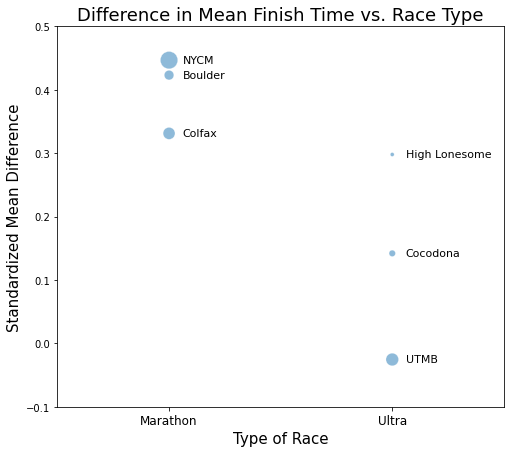

In [22]:
plt.figure(figsize=(8,7))

# Plot data for each race
plot = sns.scatterplot(x='Type', y='SMD', data=df_stats,
    size=np.log(df_stats['Runners']), sizes=(15, 300), alpha=0.5, legend=False)

# Title and axes
plt.title('Difference in Mean Finish Time vs. Race Type', fontsize=18)
plt.xlim(-0.5, 1.5)
plt.xticks(fontsize=12)
plt.xlabel('Type of Race', fontsize=15)
plt.ylim(-0.1, 0.5)
plt.ylabel('Standardized Mean Difference', fontsize=15)

# Annotate each point with the race's name
def get_x(type):
    y = 0 if (type=='Marathon') else 1
    return y
for index, row in df_stats.iterrows():
    plot.text(get_x(row['Type']) + 0.06, row['SMD'], row['Race'], va='center', fontsize=11)
    
plt.show()

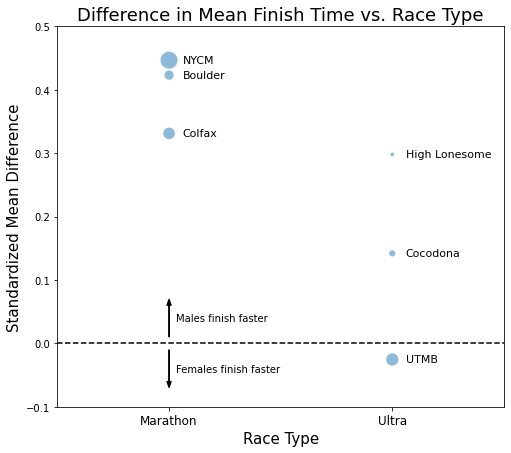

In [23]:
plt.figure(figsize=(8, 7))

# Plot SMD data
plot = sns.scatterplot( x='Type', y='SMD', data=df_stats,
    size=np.log(df_stats['Runners']), sizes=(15, 300), alpha=0.5, legend=False)

# Plot y=0 for reference
xmin = -0.5
xmax = 1.5
plt.plot([xmin, xmax], [0, 0], linestyle='--', color='black')

# Annotation & arrow for top
plt.annotate(text='Males finish faster', xy=(0.03, 0.04),
    fontsize=10, linespacing=0.8, va='center')
    
plt.arrow(x=0, y=0.01, dx=0, dy=0.05,
    head_width=0.02, head_length=0.01, color='black')

# Annotation & arrow for bottom
plt.annotate(text='Females finish faster', xy=(0.03, -0.04),
    fontsize=10, linespacing=0.8, va='center')

plt.arrow(x=0, y=-0.01, dx=0, dy=-0.05,
    head_width=0.02, head_length=0.01, color='black')

# Title and axes
plt.title('Difference in Mean Finish Time vs. Race Type', fontsize=18)
plt.xlim(xmin, xmax)
plt.xlabel('Race Type', fontsize=15)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 0.5)
plt.ylabel('Standardized Mean Difference', fontsize=15)

# Label each point with race name
def get_x(type):
    y = 0 if (type=='Marathon') else 1
    return y
for index, row in df_stats.iterrows():
    plot.text(get_x(row['Type']) + 0.06, row['SMD'], row['Race'], va='center', fontsize=11)
    
plt.show()

Let's also look at the mean differences in terms of percentages:

In [24]:
for race in races:
    perc = (stats(race)['F_avg'] / stats(race)['M_avg'] - 1) * 100
    print(f'For {disp_names[race]}, the average female finish time is '
          f'{perc:.2f}% slower than the average male finish time.')

For Boulder, the average female finish time is 7.01% slower than the average male finish time.
For Colfax, the average female finish time is 5.66% slower than the average male finish time.
For NYCM, the average female finish time is 10.49% slower than the average male finish time.
For UTMB, the average female finish time is -0.35% slower than the average male finish time.
For Cocodona, the average female finish time is 1.83% slower than the average male finish time.
For High Lonesome, the average female finish time is 3.21% slower than the average male finish time.


A possible contributor to females' improved performance, relative to men, in ultras is self-selection bias. Some people claim that only the most skilled and well-prepared women elect to participate in ultras, especially prestigious or extremely long races, skewing the results. As a rough proxy for the degree of self-selection bias, let's look at the M:F finisher ratio for each race.

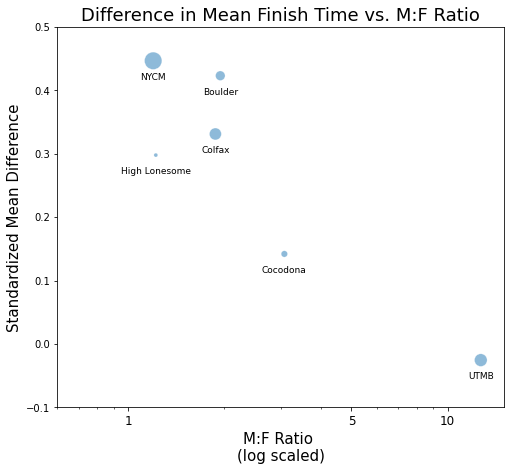

In [25]:
# Scatter plot of SMD vs M:F ratio
# add M:F ratio to df_stats
df_stats['GenderRatio'] = [stats(race)['M_n']/stats(race)['F_n'] for race in races]

plt.figure(figsize=(8, 7))

# Plot data for each race
sns.scatterplot(x='GenderRatio', y='SMD', data=df_stats,
    size=np.log(df_stats['Runners']), sizes=(15, 300), alpha=0.5, legend=False)

# Label each point with race name
for i, row in df_stats.iterrows():
    plt.text(row['GenderRatio'], row['SMD'] - 0.03, row['Race'], ha='center', fontsize=9)

# Title and axes
plt.title('Difference in Mean Finish Time vs. M:F Ratio', fontsize=18)
plt.xscale('log') # Otherwise UTMB is an outlier and the rest of the graph is squished
plt.xlim(0.6, 15)
plt.xticks(ticks=[1, 5, 10], labels=[1, 5, 10], fontsize=12)
plt.xlabel('M:F Ratio \n(log scaled)', fontsize=15)
plt.ylim(-0.1, 0.5)
plt.ylabel('Standardized Mean Difference', fontsize=15)

plt.show()

## Top Finisher Comparisons

Just as we calculated SMDs for all male runners vs. all female runners, let's look at the difference between the top finishers of each gender to see how things change.

In [26]:
def tops(race, n=5):
    '''
    Looks at top n male and top n female finish times for the race described in df.
    Inputs: race from list 'races' (e.g. '2022cocodona'); number of runners to analyze (defaults to 5)
    Ouputs: tuple (F, M, SMD) of the average finish time for the top n females in hours,
    average for top n males, and the standardized mean difference (F-M)/sd (using the standard deviation of all runners' times)
    '''
    df = data[race]
    F = df[df.Gender == 'F'].head(n)
    F = F.Time.map(get_hours).mean()
    M = df[df.Gender == 'M'].head(n)
    M = M.Time.map(get_hours).mean()
    SMD = (F - M) / df.Time.map(get_hours).std()
    
    return (F, M, SMD)

for race in races:
    print(f'{disp_names[race]}: {tops(race, 10)}\n')

Boulder: (3.5858888888888885, 3.082888888888889, 0.68648878113854)

Colfax: (3.2031666666666667, 2.671277777777777, 0.6934108321114741)

NYCM: (2.433638888888889, 2.194583333333333, 0.22906771373365012)

UTMB: (26.14608333333333, 22.128305555555553, 0.735732464504513)

Cocodona: (89.00222222222223, 74.40761111111111, 1.079256853558669)

High Lonesome: (27.235000000000003, 26.068916666666667, 0.3472071947389386)



In [27]:
# Add SMD from tops() to df_stats for plotting
df_stats['top10SMD'] = [tops(race, 10)[2] for race in races]
df_stats

,Race,Type,Runners,SMD,GenderRatio,top10SMD
0,Boulder,Marathon,403,0.422989,1.941606,0.686489
1,Colfax,Marathon,1095,0.331134,1.874016,0.693411
2,NYCM,Marathon,24934,0.446566,1.196828,0.229068
3,UTMB,Ultra,1521,-0.025425,12.702703,0.735732
4,Cocodona,Ultra,151,0.141974,3.081081,1.079257
5,High Lonesome,Ultra,91,0.297839,1.219512,0.347207


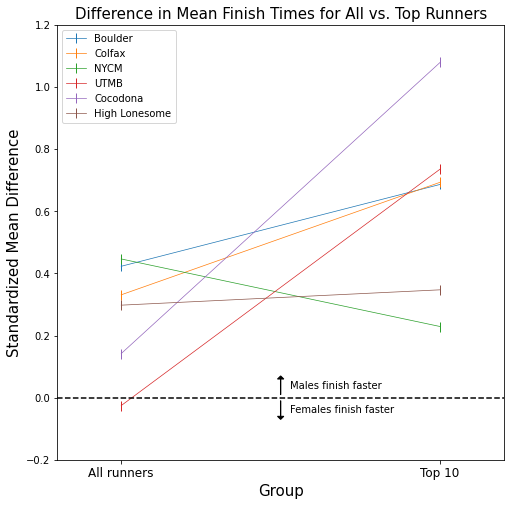

In [28]:
plt.figure(figsize=(8, 8))

# For each race: plot SMD for all runners and for top 10 runners of both genders
for i, row in df_stats.iterrows():
    plt.plot(
        ['All runners', 'Top 10'],
        [row['SMD'], row['top10SMD']],
        label=row['Race'],
        marker='|',
        ms=10,
        linewidth=0.7,
        #alpha=0.5
    )

# Plot y=0 for reference
xmin = -0.2
xmax = 1.2
plt.plot([xmin, xmax], [0, 0], linestyle='--', color='black')

# Annotation & arrow for top
plt.annotate(text='Males finish faster', xy=(0.53, 0.04),
    fontsize=10, linespacing=0.8, va='center')
    
plt.arrow(x=0.5, y=0.01, dx=0, dy=0.05,
    head_width=0.02, head_length=0.01, color='black')

# Annotation & arrow for bottom
plt.annotate(text='Females finish faster', xy=(0.53, -0.04),
    fontsize=10, linespacing=0.8, va='center')

plt.arrow(x=0.5, y=-0.01, dx=0, dy=-0.05,
    head_width=0.02, head_length=0.01, color='black')    

# Graph legend, title, and axes
plt.legend()
plt.title('Difference in Mean Finish Times for All vs. Top Runners', fontsize=15)
plt.xlim(xmin, xmax)
plt.xticks(fontsize=12)
plt.xlabel('Group', fontsize=15)
plt.ylim(-0.2, 1.2)
plt.ylabel('Standardized Mean Difference', fontsize=15)
plt.show()

## Place Calculations and Comparisons

As an extra point of comparison and because finish times for ultras can have bizarre distributions, we will also conduct some analyses of the finish places of male and female runners.

First, let's look at the distribution of runners by gender in each quartile:

In [36]:
# Function for plotting the percentage of female runners who finished in each quartile (or quintile, etc...) of the race
def dist(race, ax, bins=4):
    '''
    Plots a bar chart with bins of finishers along the x-axis (e.g. quartiles) and
    the percentage of females who finished in that bin along the y-axis.
    Inputs: name of race from list 'races' (e.g. '2022cocodona'), matplotlib axes object; optionally a number of bins
    Ouputs: list of percentages of female finishers in each bin (also populates axes object)
    '''
    df = data[race]
    f = df[df.Gender == 'F'].shape[0] # Number of female finisheres
    cutoffs = np.linspace(1, df.shape[0], bins + 1) # Cutoffs/endpoints for each bin
    X = list(range(1, bins+1))
    Y = []
    # Count up the number of female finishers in each bin (i.e. between cutoff values)
    for i in range(bins):
        start = np.ceil(cutoffs[i])
        stop = np.ceil(cutoffs[i+1]) - 1
        df_temp = df.loc[start:stop]
        Y.append(df_temp[df_temp.Gender == 'F'].shape[0])
    # Convert each number to a percentage of female finishers
    Y = [val/f * 100 for val in Y]

    ax.bar(X, Y)
    ax.set_xlim(1-0.5, bins+0.5)
    ax.set_xticks(X, X)
    ax.set_xlabel('Quartile')
    ax.set_ylim(0, 100/bins + 15)
    ax.set_ylabel('% of Females')
    # Add dashed line indicating what an even distribution would look like
    ax.plot([1-0.4, bins+0.4], [100/bins, 100/bins], linestyle='--', color='black')
    
    return Y

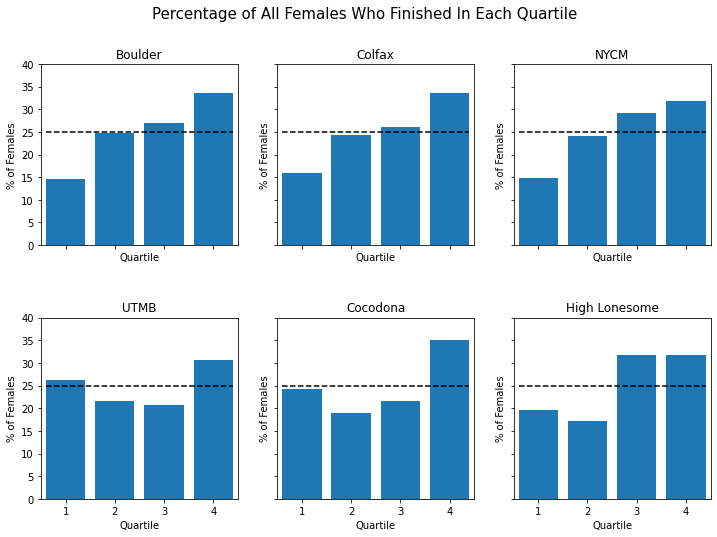

In [37]:
# Make a dataframe to store the percentile of female runners in each quartile for each race
dfq = pd.DataFrame(columns = ['Race', 'Q1', 'Q2', 'Q3', 'Q4'])
dfq['Race'] = [disp_names[race] for race in races]
dfq.set_index('Race', inplace=True, drop=True)

# Set up two rows of three subplots - marathons on top and ultras on bottom
fig, axs = plt.subplots(
    2, 3, figsize=(12, 8),
    sharex=True, sharey=True,
    gridspec_kw={'hspace': 0.4}
)
axs = axs.flatten()
for (race, ax) in zip(races, axs):
    # Store data to dfq and add it to its subplot simultaneously
    dfq.loc[disp_names[race]] = dist(race, ax, 4)
    ax.set_title(disp_names[race], fontsize=12)

plt.suptitle("Percentage of All Females Who Finished In Each Quartile", fontsize=15)
plt.show()

In [16]:
# Take a closer look at exact values:
dfq

,Q1,Q2,Q3,Q4
Race,,,,
Boulder,14.59854,24.817518,27.007299,33.576642
Colfax,16.010499,24.409449,25.984252,33.595801
NYCM,14.907489,24.035242,29.268722,31.788546
UTMB,26.126126,21.621622,20.720721,30.630631
Cocodona,24.324324,18.918919,21.621622,35.135135
High Lonesome,19.512195,17.073171,31.707317,31.707317


In [17]:
# Percent of female finishers in each quartile averaged by race type
print(f'Mean percentages for marathons:\n{dfq.iloc[0:3, :].mean()}'
      f'\n\nMean percentages for ultras:\n{dfq.iloc[3:6, :].mean()}')

Mean percentages for marathons:
Q1    15.172176
Q2    24.420736
Q3    27.420091
Q4    32.986996
dtype: float64

Mean percentages for ultras:
Q1    23.320882
Q2    19.204570
Q3    24.683220
Q4    32.491028
dtype: float64


Next, let's look at the median finish place for male and female runners in each race:

In [18]:
# Look at median finisher places for M and F
def medians(race):
    '''
    Input: name of race from list 'races' (e.g. '2022cocodona')
    Output: Median finishing place for M and F and separation as a percentage of all runners
    '''
    df = data[race].reset_index()
    m = df[df.Gender == 'M'].Place.median()
    f = df[df.Gender == 'F'].Place.median()
    diff = (f - m) / df.shape[0] * 100
    return (m, f, diff)

for race in races:
    print(f'For {disp_names[race]}:')
    temp = medians(race)
    print(f'Median finish place is {temp[0]} for males, {temp[1]} for females.'
         f'The difference is {temp[2]:.2f}% of all finishers.')
    print('')

For Boulder:
Median finish place is 181.0 for males, 243.0 for females.The difference is 15.38% of all finishers.

For Colfax:
Median finish place is 491.5 for males, 654.0 for females.The difference is 14.84% of all finishers.

For NYCM:
Median finish place is 10130.5 for males, 14960.5 for females.The difference is 19.37% of all finishers.

For UTMB:
Median finish place is 758.5 for males, 816.0 for females.The difference is 3.78% of all finishers.

For Cocodona:
Median finish place is 73.0 for males, 91.0 for females.The difference is 11.92% of all finishers.

For High Lonesome:
Median finish place is 39.5 for males, 56.0 for females.The difference is 18.13% of all finishers.



In [19]:
# Add the 'diff' output from medians() to df_stats for graphing
df_stats['MedianDiff'] = [medians(race)[2] for race in races]
df_stats

,Race,Type,Runners,SMD,GenderRatio,MedianDiff
0,Boulder,Marathon,403,0.422989,1.941606,15.384615
1,Colfax,Marathon,1095,0.331134,1.874016,14.840183
2,NYCM,Marathon,24934,0.446566,1.196828,19.371140
3,UTMB,Ultra,1521,-0.025425,12.702703,3.780408
4,Cocodona,Ultra,151,0.141974,3.081081,11.920530
5,High Lonesome,Ultra,91,0.297839,1.219512,18.131868


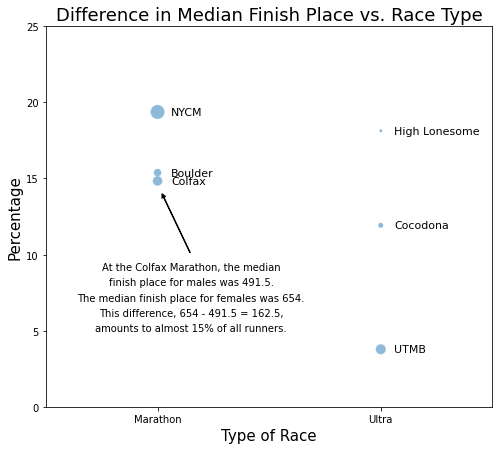

In [20]:
# Plot MedianDiff vs race Type
plt.figure(figsize=(8, 7))

plot = sns.scatterplot(x='Type', y='MedianDiff', data=df_stats,
    size=np.log(df_stats['Runners']), sizes=(10, 200), alpha=0.5, legend=False)

# Axes and title
plt.title('Difference in Median Finish Place vs. Race Type', fontsize=18)
plt.xlim(-0.5, 1.5)
plt.xlabel('Type of Race', fontsize=15)
plt.ylim(0, 25)
plt.ylabel('Percentage', fontsize=15)

# Annotate each point with the race name
def get_x(type):
    y = 0 if (type=='Marathon') else 1
    return y
for index, row in df_stats.iterrows():
    plot.text(get_x(row['Type']) + 0.06, row['MedianDiff'], row['Race'], va='center', fontsize=11)

# Annotated text for Colfax Marathon explaining the graph mechanics
str1 = '''
At the Colfax Marathon, the median\n
finish place for males was 491.5.\n
The median finish place for females was 654.\n
This difference, 654 - 491.5 = 162.5,\n
amounts to almost 15% of all runners.
'''
plt.annotate(
    str1,
    xy=(0.02, 14),
    xytext=(0.15, 10),
    fontsize=10,
    va='top',
    ha='center',
    linespacing=0.7,
    arrowprops={'width': 0.5, 'headwidth': 4, 'headlength': 4, 'color': 'black'}
)

plt.show()

## Finisher Curves

This builds off the above place comparisons and shows more detailed distibutions of finishing places for female runners.

In [24]:
def finisher_curve(race):
    '''
    Input: race from list 'races' (e.g. '2022cocodona')
    Ouput: tuple (X, Y) of x- and y- coordinates. Each (x, y) is a female finisher with
    * x = percentile ranking among female finishers
    * y = percentile ranking among all finishers
    '''
    df = data[race]
    dff = df[df.Gender == 'F'].reset_index()
    dff['GenderPlace'] = list(range(1, dff.shape[0] + 1))
    X = dff.GenderPlace / dff.shape[0] * 100
    Y = dff.Place / df.shape[0] * 100
    
    return (X, Y)

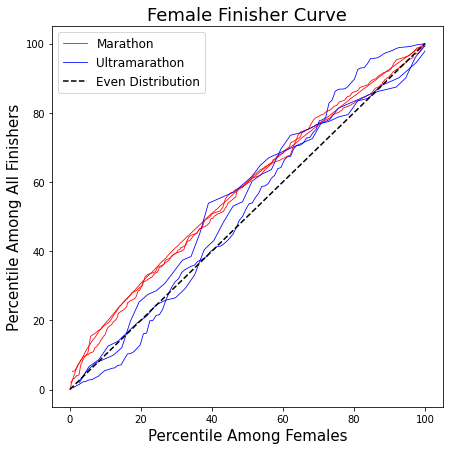

In [25]:
# Plot the finisher curve for each race, color coding traces by race type
marathons = races[0:3]
def race_col(race):
    color = 'red' if race in marathons else 'blue'
    return color

plt.figure(figsize=(7, 7))

# Plot the data for each race
leg = dict()
for race in races:
    curve = finisher_curve(race)
    leg[race], = plt.plot(curve[0], curve[1], c=race_col(race), linewidth=0.8)

# Add a dashed line showing a theoretical even distribution of runners (no difference between males and females)
even, = plt.plot([0, 100], [0, 100], linestyle='--', c='black')

# Legend, title, and axes
plt.legend(
    [leg[races[0]], leg[races[3]], even],
    ['Marathon', 'Ultramarathon', 'Even Distribution'],
    fontsize=12
)
plt.title('Female Finisher Curve', fontsize=18)
plt.xlabel('Percentile Among Females', fontsize=15)
plt.ylabel('Percentile Among All Finishers', fontsize=15)

plt.show()

Since the finisher curves all hover close to the dashed line, let's take a closer look at the deviations of each curve from the dashed line:

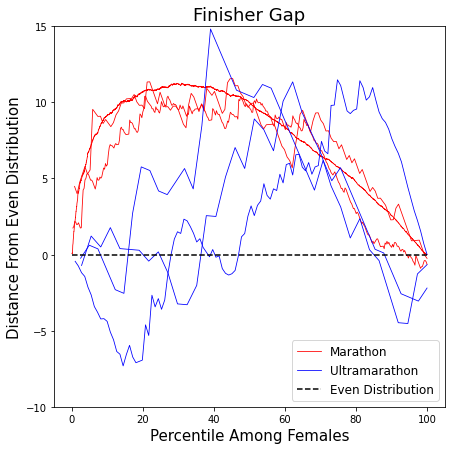

In [26]:
# Mostly the same as above...
plt.figure(figsize=(7, 7))

leg = dict()
for race in races:
    curve = finisher_curve(race)
    # ...Except here where we plot y = the deviation from the dashed line
    leg[race], = plt.plot(curve[0], curve[1] - curve[0], c=race_col(race), linewidth=0.8)
plt.ylim(-10, 15)

plt.plot([0, 100], [0, 0], linestyle='--', c='black')

plt.legend(
    [leg[races[0]], leg[races[3]], even],
    ['Marathon', 'Ultramarathon', 'Even Distribution'],
    fontsize=12
)
plt.title('Finisher Gap', fontsize=18)
plt.xlabel('Percentile Among Females', fontsize=15)
plt.ylabel('Distance From Even Distribution', fontsize=15)

plt.show()